[1.00121119 1.99908064]
6.060407104044875e-06
0.1435525075359525


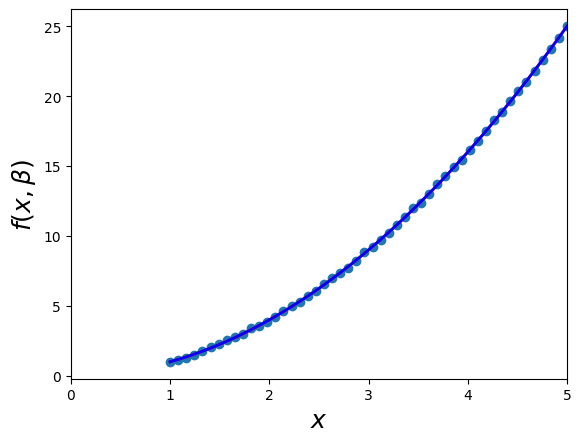

In [2]:
import numpy as np
import scipy as sp
import  matplotlib.pyplot as plt

beta = (1, 2)
def f(x, be, b1):
    return be * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)  
ax.plot(xdata, y, 'r', lw=2)  
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)  
ax.set_xlim(0, 5)  
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)  
plt.show() 

26780.09915062818
[9312.57512673]


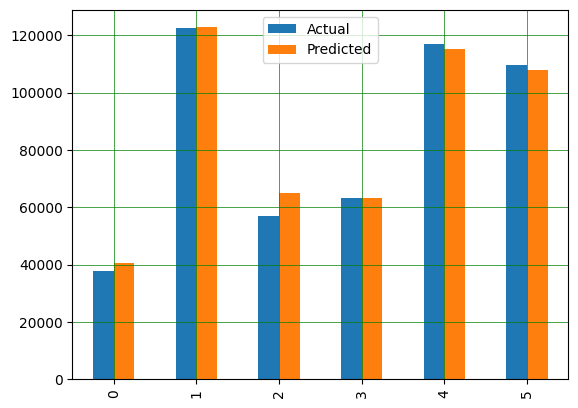

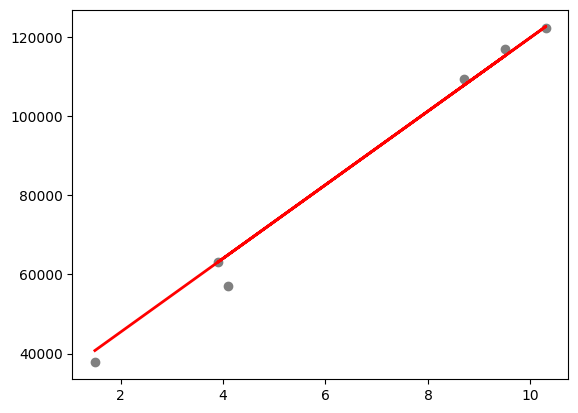

In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("Salary_Data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [35]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("petrol_consumption.csv")
df.head(5)
X = df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = df['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df
y_pred = regressor.predict(X_test)
dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [36]:
print('Среднеквадратичная ошибка:', metrics.mean_squared_error(y_test, y_pred))

Среднеквадратичная ошибка: 4666.344787588368
